#Tópicos Avanzados de Computación II
##Dr. Carlos Villaseñor
##Lección 1 - Introducción a Redes Neuronales Artificiales
### Programación del Perceptrón, aproximación de compuertas lógicas y clasificación de sobrepeso

  Importamos Numpy

In [17]:
import numpy as np
import matplotlib.pyplot as plt

Primeramente programamos nuestro perceptrón

In [18]:
class Perceptron:

  def __init__(self, n_inputs, learning_rate):
    self.w = - 1 + 2 * np.random.rand(n_inputs)
    self.b = - 1 + 2 * np.random.rand()
    self.eta = learning_rate

  def predict(self, X):
    _, p = X.shape
    y_est = np.zeros(p)
    for i in range(p):
      y_est[i] = np.dot(self.w, X[:,i])+self.b
      if y_est[i] >= 0:
        y_est[i]=1
      else:
        y_est[i]=0
    return y_est

  def fit(self, X, Y, epochs=50):
    _, p = X.shape
    for _ in range(epochs):
      for i in range(p):
        y_est = self.predict(X[:,i].reshape(-1,1))
        self.w += self.eta * (Y[i]-y_est) * X[:,i]
        self.b += self.eta * (Y[i]-y_est)
        self.draw_2d_percep()

  def draw_2d_percep(self, params='--k'):
    w1, w2, b = self.w[0], self.w[1], self.b
    plt.plot([-2, 2],[(1/w2)*(-w1*(-2)-b),(1/w2)*(-w1*2-b)], params)

Entrenamos el modelo con la tabla de una compuerta lógica

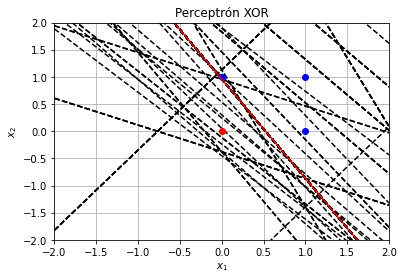

In [33]:
# Instanciar el modelo
model = Perceptron(2, 0.1)

# Datos
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])
Y = np.array([0, 1, 1, 1])

# Entrenar
model.fit(X,Y)

# Predicción
model.predict(X)

# Primero dibujemos los puntos
_, p = X.shape
for i in range(p):
  if Y[i] == 0:
    plt.plot(X[0,i],X[1,i], 'or')
  else:
    plt.plot(X[0,i],X[1,i], 'ob')

plt.title('Perceptrón XOR')
plt.grid('on')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

model.draw_2d_percep('-r')